# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px


In [2]:
#Seu código de importação aqui
df = pd.read_csv('C:\\Users\\jovei\\OneDrive\\Área de Trabalho\\git\\EBAC\\Atividades\\Atividade_modulo_9\\Atividade.csv')
df.head(3)

,Identidade,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,Servico_Telefone,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,TVporassinatura,Tipo_Contrato,MetodosdePagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53,108.15,1


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [3]:
#Seu código aqui
df.describe()

,Idoso,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago,Churn
count,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000
mean,0.161576,32.352090,64.990756,2290.087178,0.260048
std,0.368135,24.636885,27.995999,2264.585643,0.438749
min,0.000000,0.000000,18.000000,18.800000,0.000000
25%,0.000000,8.000000,45.000000,402.337500,0.000000
50%,0.000000,29.000000,64.000000,1402.900000,0.000000
75%,0.000000,56.000000,87.000000,3867.162500,1.000000
max,1.000000,72.000000,118.000000,8564.750000,1.000000


In [4]:
(df['Idoso']== 0).sum()
# um possíveis outliers esta na variavel Idoso pois 2086 valores dessa variavel estão zerados 

np.int64(2086)

In [5]:
df['Genero']=df['Genero'].str.replace ('Male','M', regex=False)
df['Genero']= df['Genero'].str.replace('Female','F', regex =False)
df['Genero']= df['Genero'].str.replace('f','F', regex= False)
df['Genero'].unique()


array(['F', 'M'], dtype=object)

C:\Users\jovei\AppData\Local\Temp\ipykernel_23680\3676431482.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text (i, v + 1, f'{porcentagem_Genero[i]:.2f}%', ha= 'center' )


Text(0, 0.5, 'Frequência')

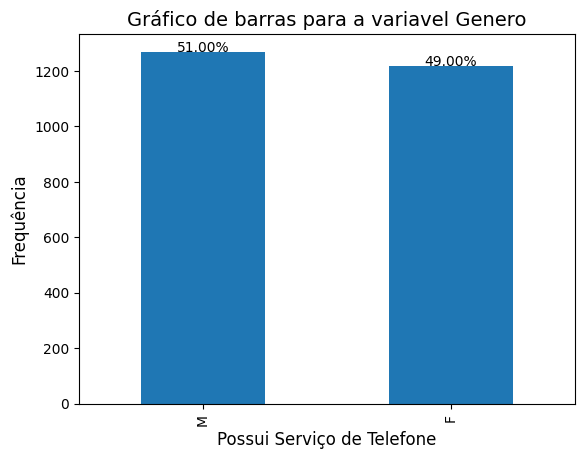

In [6]:
Genero= df['Genero'].value_counts()
porcentagem_Genero = Genero / Genero.sum()*100

ax=Genero.plot(kind='bar')
for i,v in enumerate(Genero):
    ax.text (i, v + 1, f'{porcentagem_Genero[i]:.2f}%', ha= 'center' )

plt.title ('Gráfico de barras para a variavel Genero',fontsize=14)
plt.xlabel ('Possui Serviço de Telefone',fontsize = 12)
plt.ylabel('Frequência', fontsize=12)

Text(0, 0.5, 'Frequência')

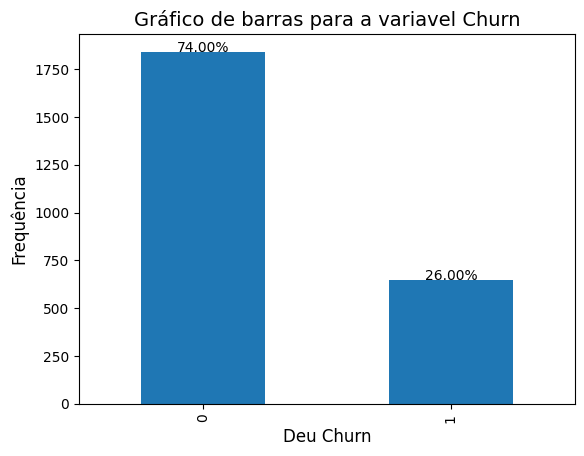

In [7]:
Churn = df['Churn'].value_counts()

porcentagem = Churn / Churn.sum()*100
ax = Churn.plot (kind='bar')
for i, v in enumerate(Churn):
    ax.text(i,v +1, f'{porcentagem[i]:.2f}%', ha='center' )
plt.title ('Gráfico de barras para a variavel Churn',fontsize=14)
plt.xlabel ('Deu Churn',fontsize = 12)
plt.ylabel('Frequência', fontsize=12)

C:\Users\jovei\AppData\Local\Temp\ipykernel_23680\2540912303.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i,v +1, f'{porcentagem_Casado[i]:.2f}%', ha= 'center')


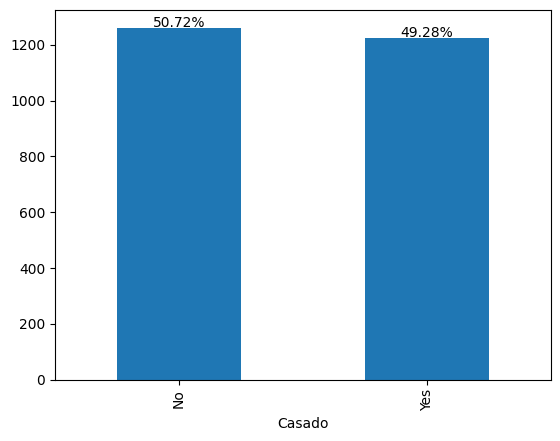

In [8]:
Casado = df['Casado'].value_counts()
porcentagem_Casado = Casado/Casado.sum()*100

ax= Casado.plot (kind= 'bar')
for i,v in enumerate(Casado):
    ax.text(i,v +1, f'{porcentagem_Casado[i]:.2f}%', ha= 'center')

C:\Users\jovei\AppData\Local\Temp\ipykernel_23680\230497232.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i,v+1, f'{porcentagem_Suporte_Tecnico[i]:.2f}%', ha= 'center')


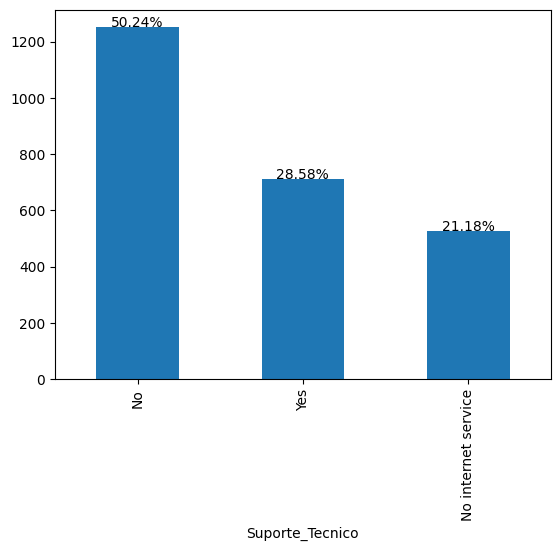

In [9]:
Suporte_Tecnico = df['Suporte_Tecnico'].value_counts()
porcentagem_Suporte_Tecnico	= Suporte_Tecnico/Suporte_Tecnico.sum()*100

ax= Suporte_Tecnico.plot (kind= 'bar')
for i, v in enumerate(Suporte_Tecnico):
    ax.text(i,v+1, f'{porcentagem_Suporte_Tecnico[i]:.2f}%', ha= 'center')

In [10]:
Genero =df['Genero'].value_counts()
(Genero/Genero.sum()*100)

Idoso = df['Idoso'].value_counts()
(Idoso/Idoso.sum()*100)

Casado = df['Casado'].value_counts()
(Casado/Casado.sum()*100)

Dependents = df['Dependents'].value_counts()
Dependents/Dependents.sum()*100

Servico_Telefone = df['Servico_Telefone'].value_counts()
Servico_Telefone/Servico_Telefone.sum()*100

Servico_Internet = df['Servico_Internet'].value_counts()
Servico_Internet/Servico_Internet.sum()*100

Servico_Seguranca = df['Servico_Seguranca'].value_counts()
Servico_Seguranca/Servico_Seguranca.sum()*100

Suporte_Tecnico = df['Suporte_Tecnico'].value_counts()
Suporte_Tecnico/Suporte_Tecnico.sum()*100

TVporassinatura = df['TVporassinatura'].value_counts()
TVporassinatura/TVporassinatura.sum()*100



TVporassinatura
No                     40.233119
Yes                    38.585209
No internet service    21.181672
Name: count, dtype: float64

As variaveis: TVporassinatura; Casado; Dependents; Servico_Internet; Servico_Seguranca; Suporte_Tecnico são balancedas jas as variaveis: Idoso; Servico_Telefone não estão balancedas 

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


In [ ]:
#Seu código aqui


Esse banco de dados tem uma quantidade de outilers pequena e, caso seja feito o tratamento deles, serão passadas informações 
erradas para os clientes.

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

In [16]:
#Seu código aqui

px.histogram(df, x='Churn', color= 'Genero', barmode= 'stack',labels='Gráfico de Genero vs Churn' )

In [12]:
px.histogram(df, x= 'Churn', color= 'Casado', barmode = 'stack',labels='Gráfico de Casados vs Churn',)

In [13]:
fig = px.histogram(df, x='Tempo_como_Cliente', color='Churn', 
                   nbins=20, 
                   title='Distribuição do Tempo como Cliente por Churn',
                   labels={'Tempo_como_Cliente': 'Tempo como Cliente', 'Churn': 'Churn'})

fig.update_traces(opacity=0.5)


In [14]:
px.histogram(df, x= 'Tipo_Contrato', color= 'Churn',nbins=20,
             title= 'Distribuição do Tipo de Contrato por Churn',
             labels={'Tipo_contrato': 'Tipo de Contrato'})

In [15]:
px.histogram(df, x='Total_Pago', color= 'Churn', nbins=20,
             title='Distribuição do Valor Pago por Churn',
             labels={'Total_Pago': 'Total Pago'})

Observando o primeiro gráfico onde foi feita uma análise por sexo, é possível observar que esse gráfico não ajuda a determinar se o cliente vai dar churn ou não, pois ambos os sexos dão churn praticamente na mesma quantidade.
O segundo gráfico, onde é avaliado se a pessoa é casada ou não, é possivel observar que as pessoas casadas dão churn em uma menor proporção sendo assim, teriam que ser feitas uma ação para os solteiros para fidelizar esse grupo.
Avaliando o tempo como cliente e possivel observar que clientes com menos tempo tem maior chance de dar churn e uma forma de fidelizar esse cliente poderia ser vender um produto com um maior tempo como e mostrado no gráfico seguinte, pois clientes que fizeram o contrato com um ano ou dois deram menos churn, ou vender um contrato com um valor maior, pois no último gráfico mostra que clientes que pagam um valor maior nos seus planos tem menos chance de dar churn.